# Assignment 4: Support Vector Machine (SVM) and Model Ensemble {-}

This assignment aims at familiarizing you with training and testing Suppor Vector Machine classification model, along with exploiting the power of model ensemble technics. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Remove outliers and clean the data.
- Use GridSearchCV to find the best set of SVM hyperparameters.
- Build, train and evaluate the SVM model.
- Separately build, train and evaluate the other four classifiers (Logistic regression, Naive Bayes, Decision Tree, Random Forest) on the same dataset, then compare their performance with the SVM model's.
- Apply three model ensemble technics, i.e., Bagging, Boosting and Stacking, to solve the problem, then compare their performance with each other and with the use of individual models. Draw conclusion from what has been observed.

The dataset you will be working on is 'data-breast-cancer.csv'. It is composed of attributes to build a prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment4 (e.g., ML4DS-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv("https://github.com/ddutjnrevenge-universe/MachineLearningforDataScience/raw/main/Assignment%204/data-breast-cancer.csv")

In [3]:
# Show some data samples
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features:

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



# Analyze the data

In [4]:
# Your code goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


There's no null value in the dataset!

In [5]:
df.shape

(569, 12)

In [6]:
# Create a copy of the dataset
data = df.copy()

# Drop the columns Unnamed:0
data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [8]:
# Check for duplicated data
data.duplicated().values.any()

False

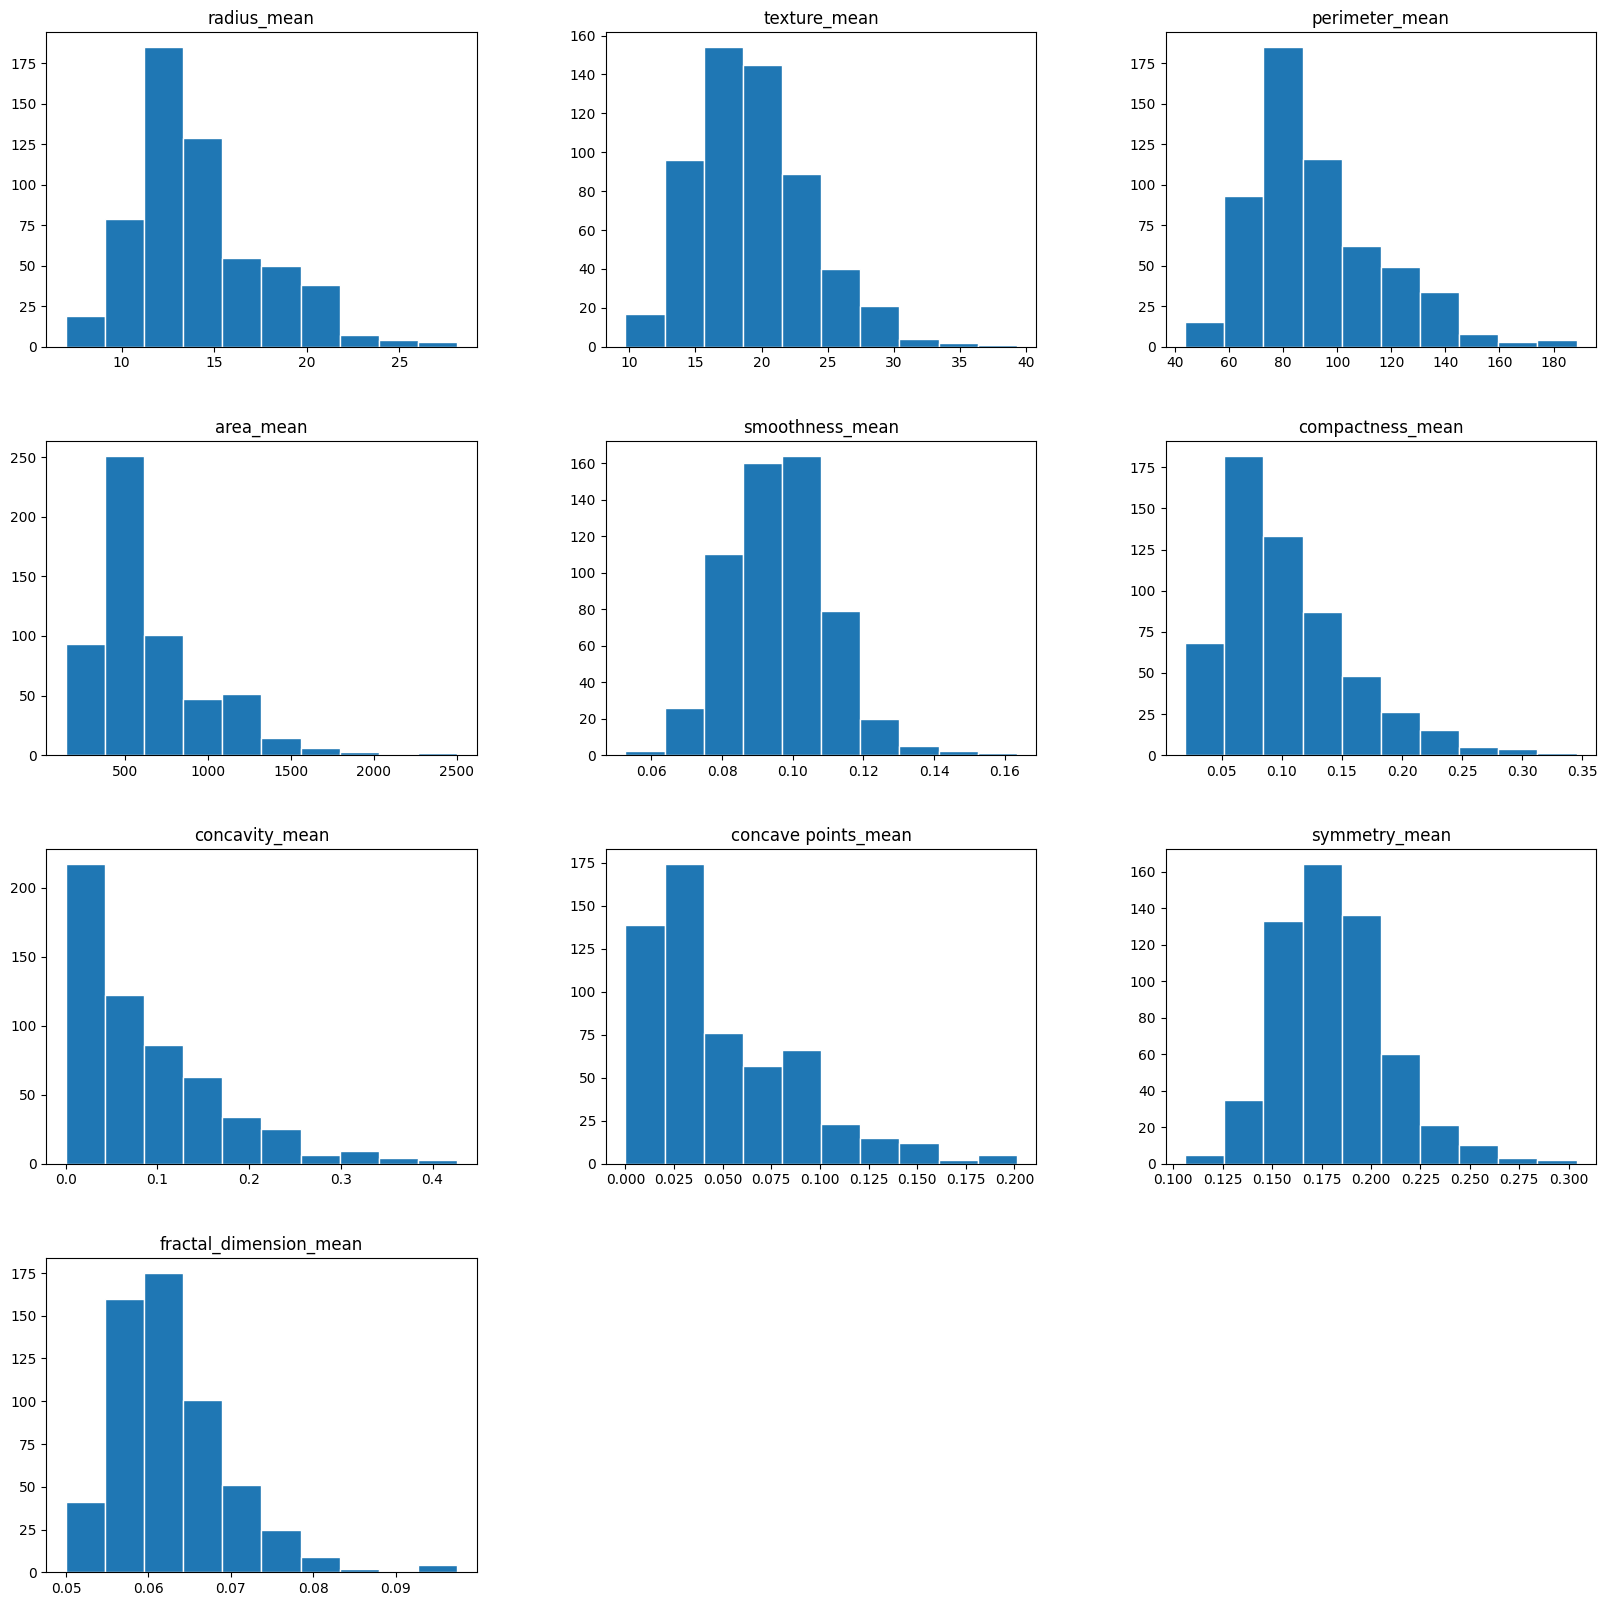

In [20]:
# Draw the histogram of the data's features
data.hist(figsize=(20,20), histtype='bar', ec='white',grid=False)
plt.show()

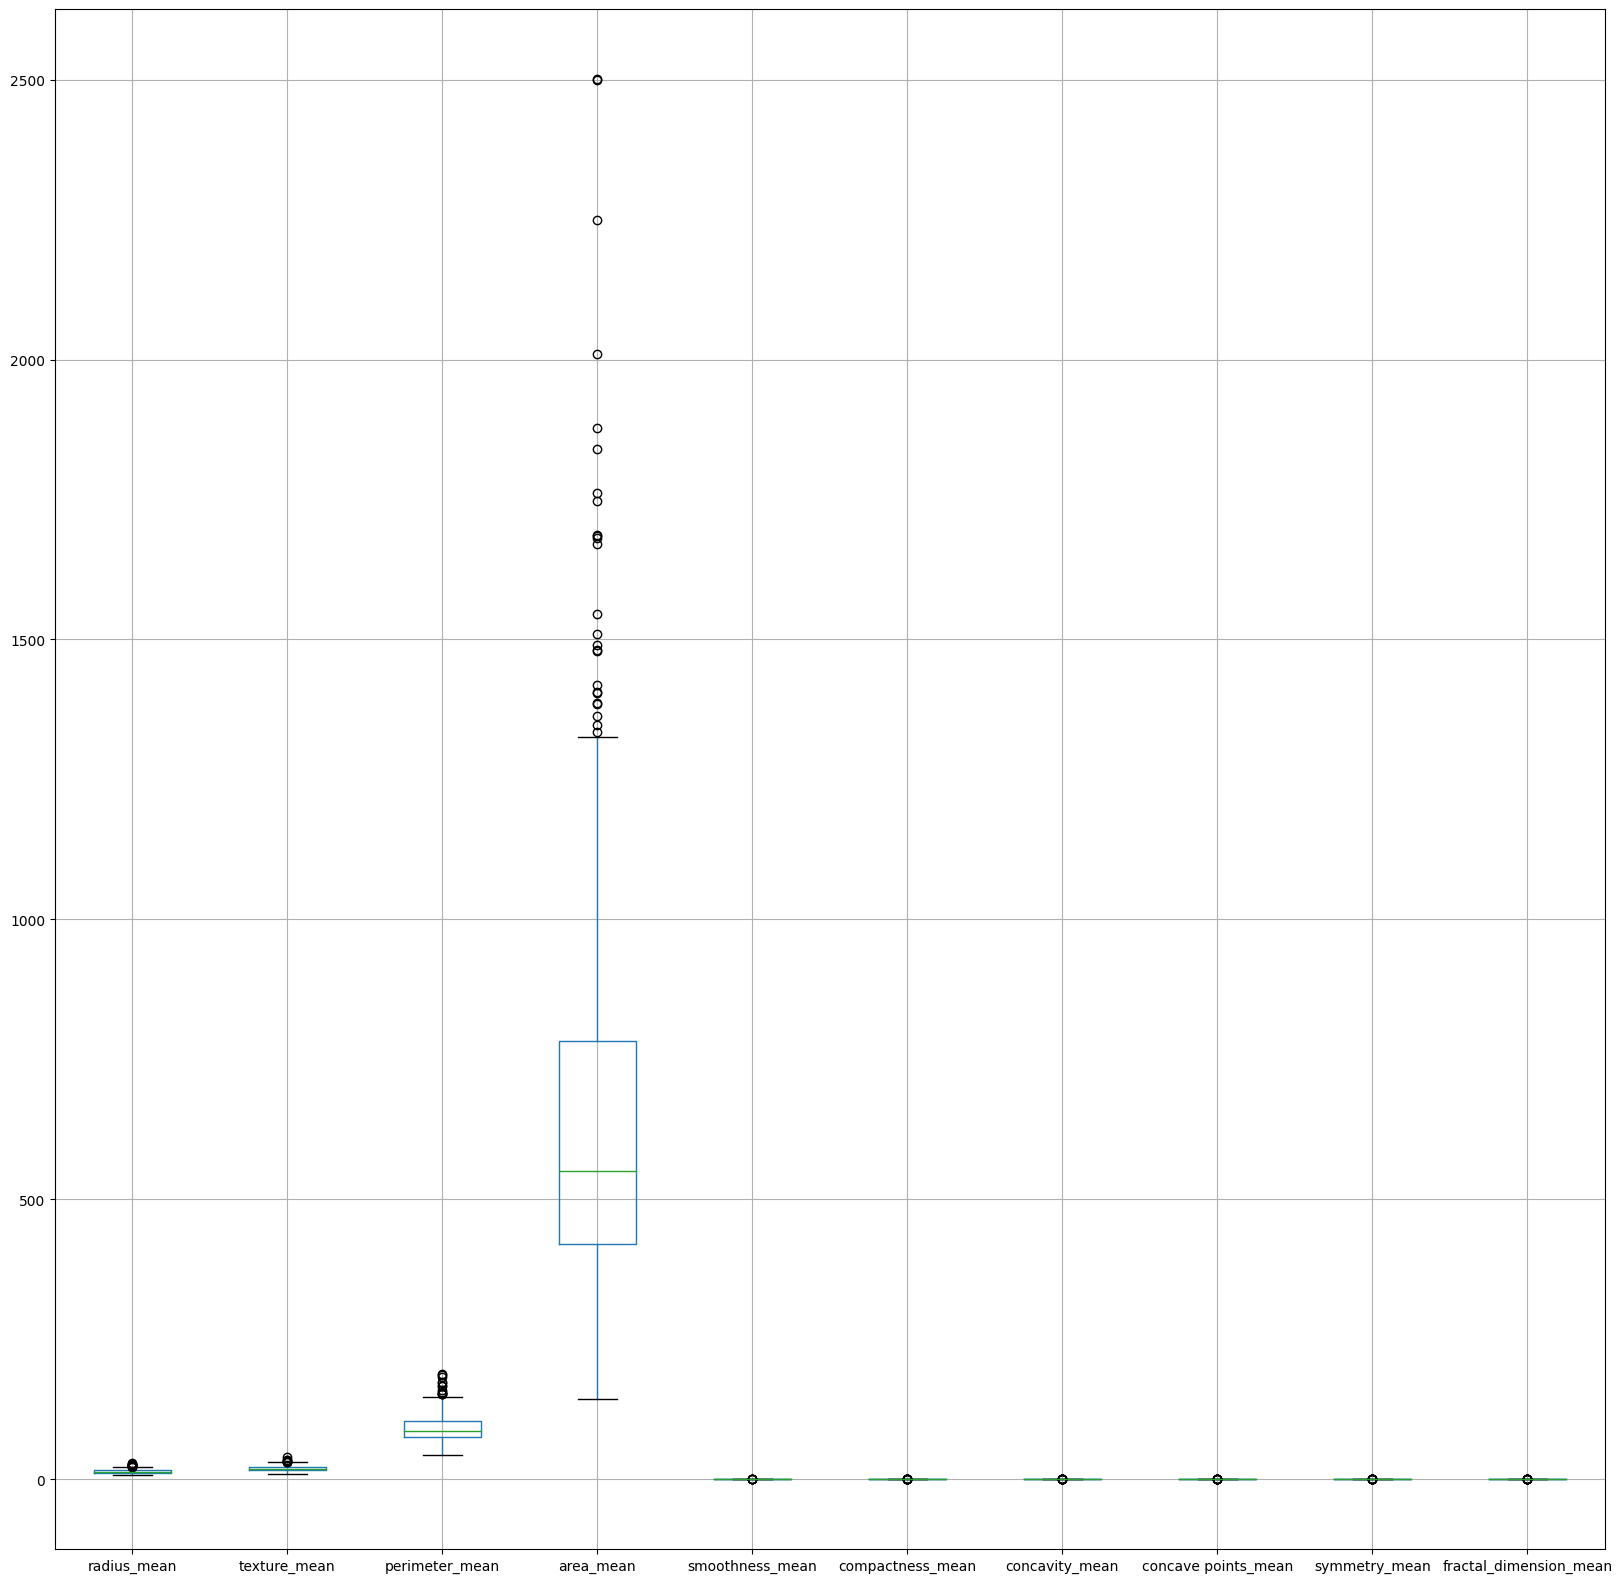

In [10]:
# Draw the boxplots of data features
data.boxplot(figsize=(20,20))
plt.show()

In [11]:
# Extract the numerical features
num_cols = [col for col in data.columns if data[col].dtypes == 'float64']
num_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

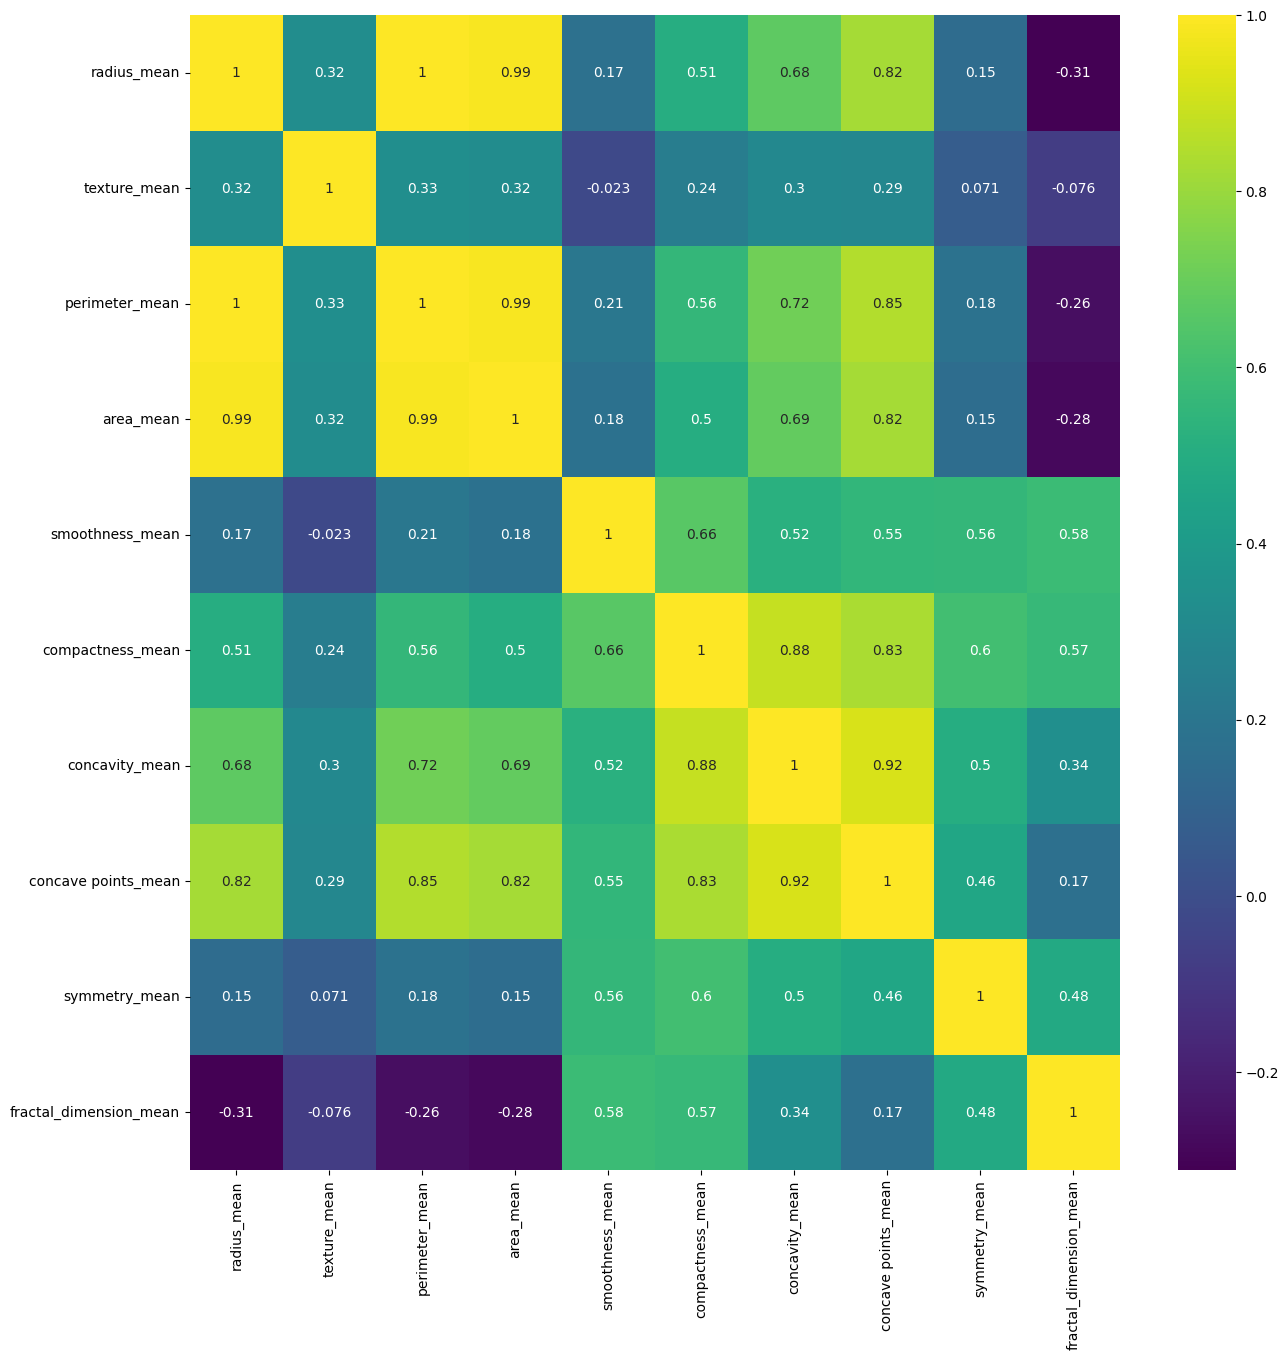

In [12]:
# Heatmap for correlations
plt.figure(figsize=(15,15))
sns.heatmap(data[num_cols].corr(), cmap="viridis", annot=True)
plt.show()

In [13]:
df.describe()

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,142.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,284.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,426.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,568.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [21]:
# Create the dataframe with the median of every feature for each label
diagnosis_median = data.groupby('diagnosis').median()
diagnosis_median

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575


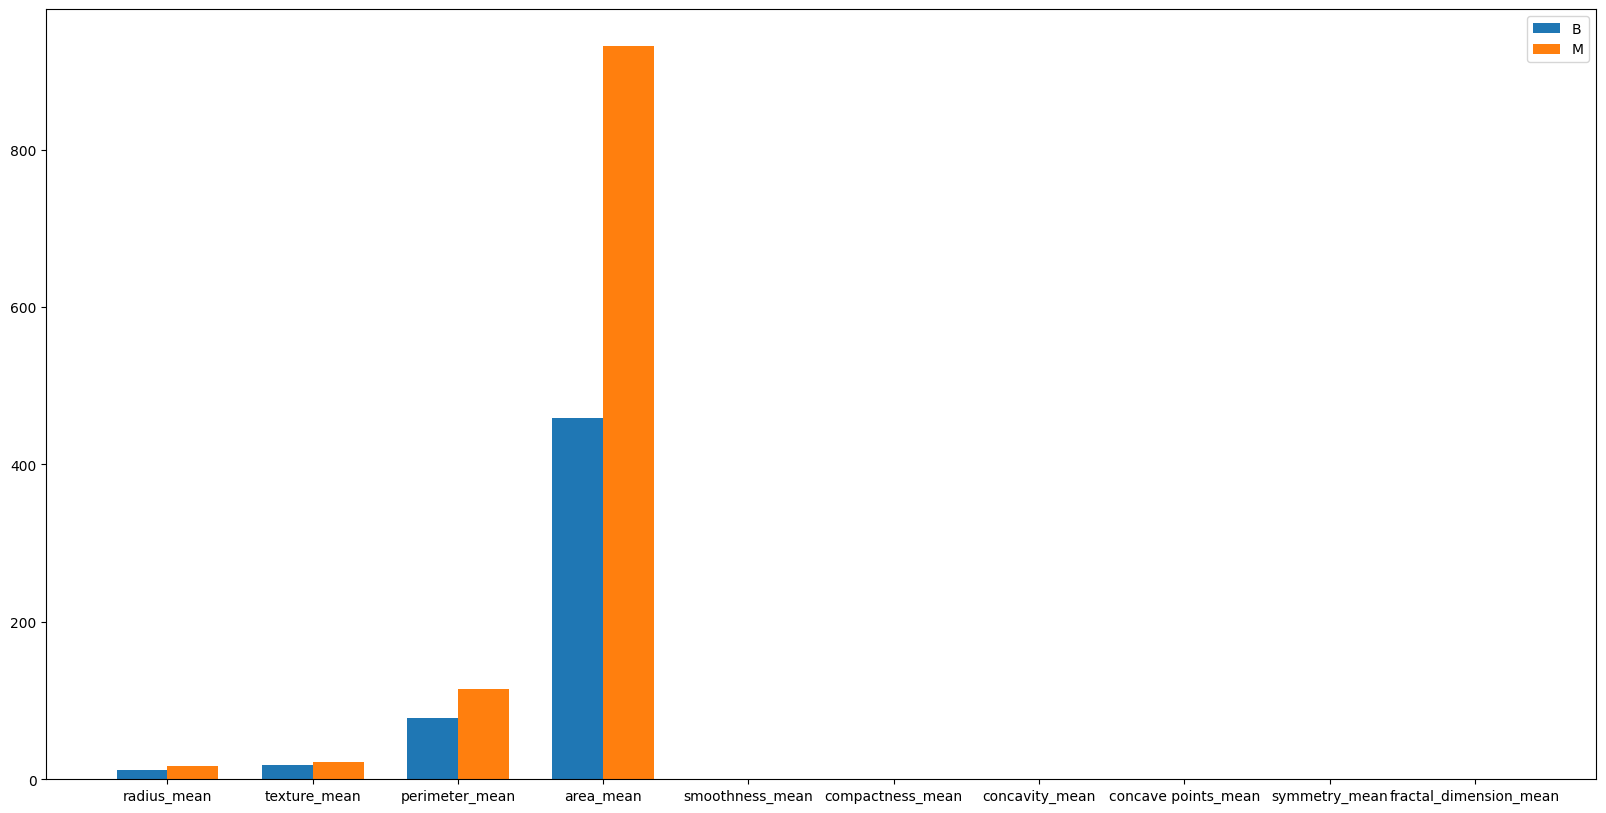

In [22]:
B = diagnosis_median.loc['B'].tolist()
M = diagnosis_median.loc['M'].tolist()

x = np.arange(len(diagnosis_median.columns))
width = 0.35

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x-width/2, B, width, label='B')
rects2 = ax.bar(x+width/2, M, width, label='M')

ax.set_xticks(x)
ax.set_xticklabels(diagnosis_median.columns)
plt.legend()
plt.show()

# Remove outliers & clean the data

In [156]:
# Define a function to remove outliers from a numerical column
def remove_outliers(df, col):
    q_high = df[col].quantile(0.98)  # Select upper quantile range as 98%
    q_low = df[col].quantile(0.02)   # Select lower quantile range as 2%
    df_clean = df[(df[col] < q_high) & (df[col] > q_low)]
    return df_clean

# Initialize a dataframe to store the cleaned data
df_cleaned = data.copy()

# Iterate over each numerical column and remove outliers
for col in num_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset:", df_cleaned.shape)


Shape of cleaned dataset: (369, 11)


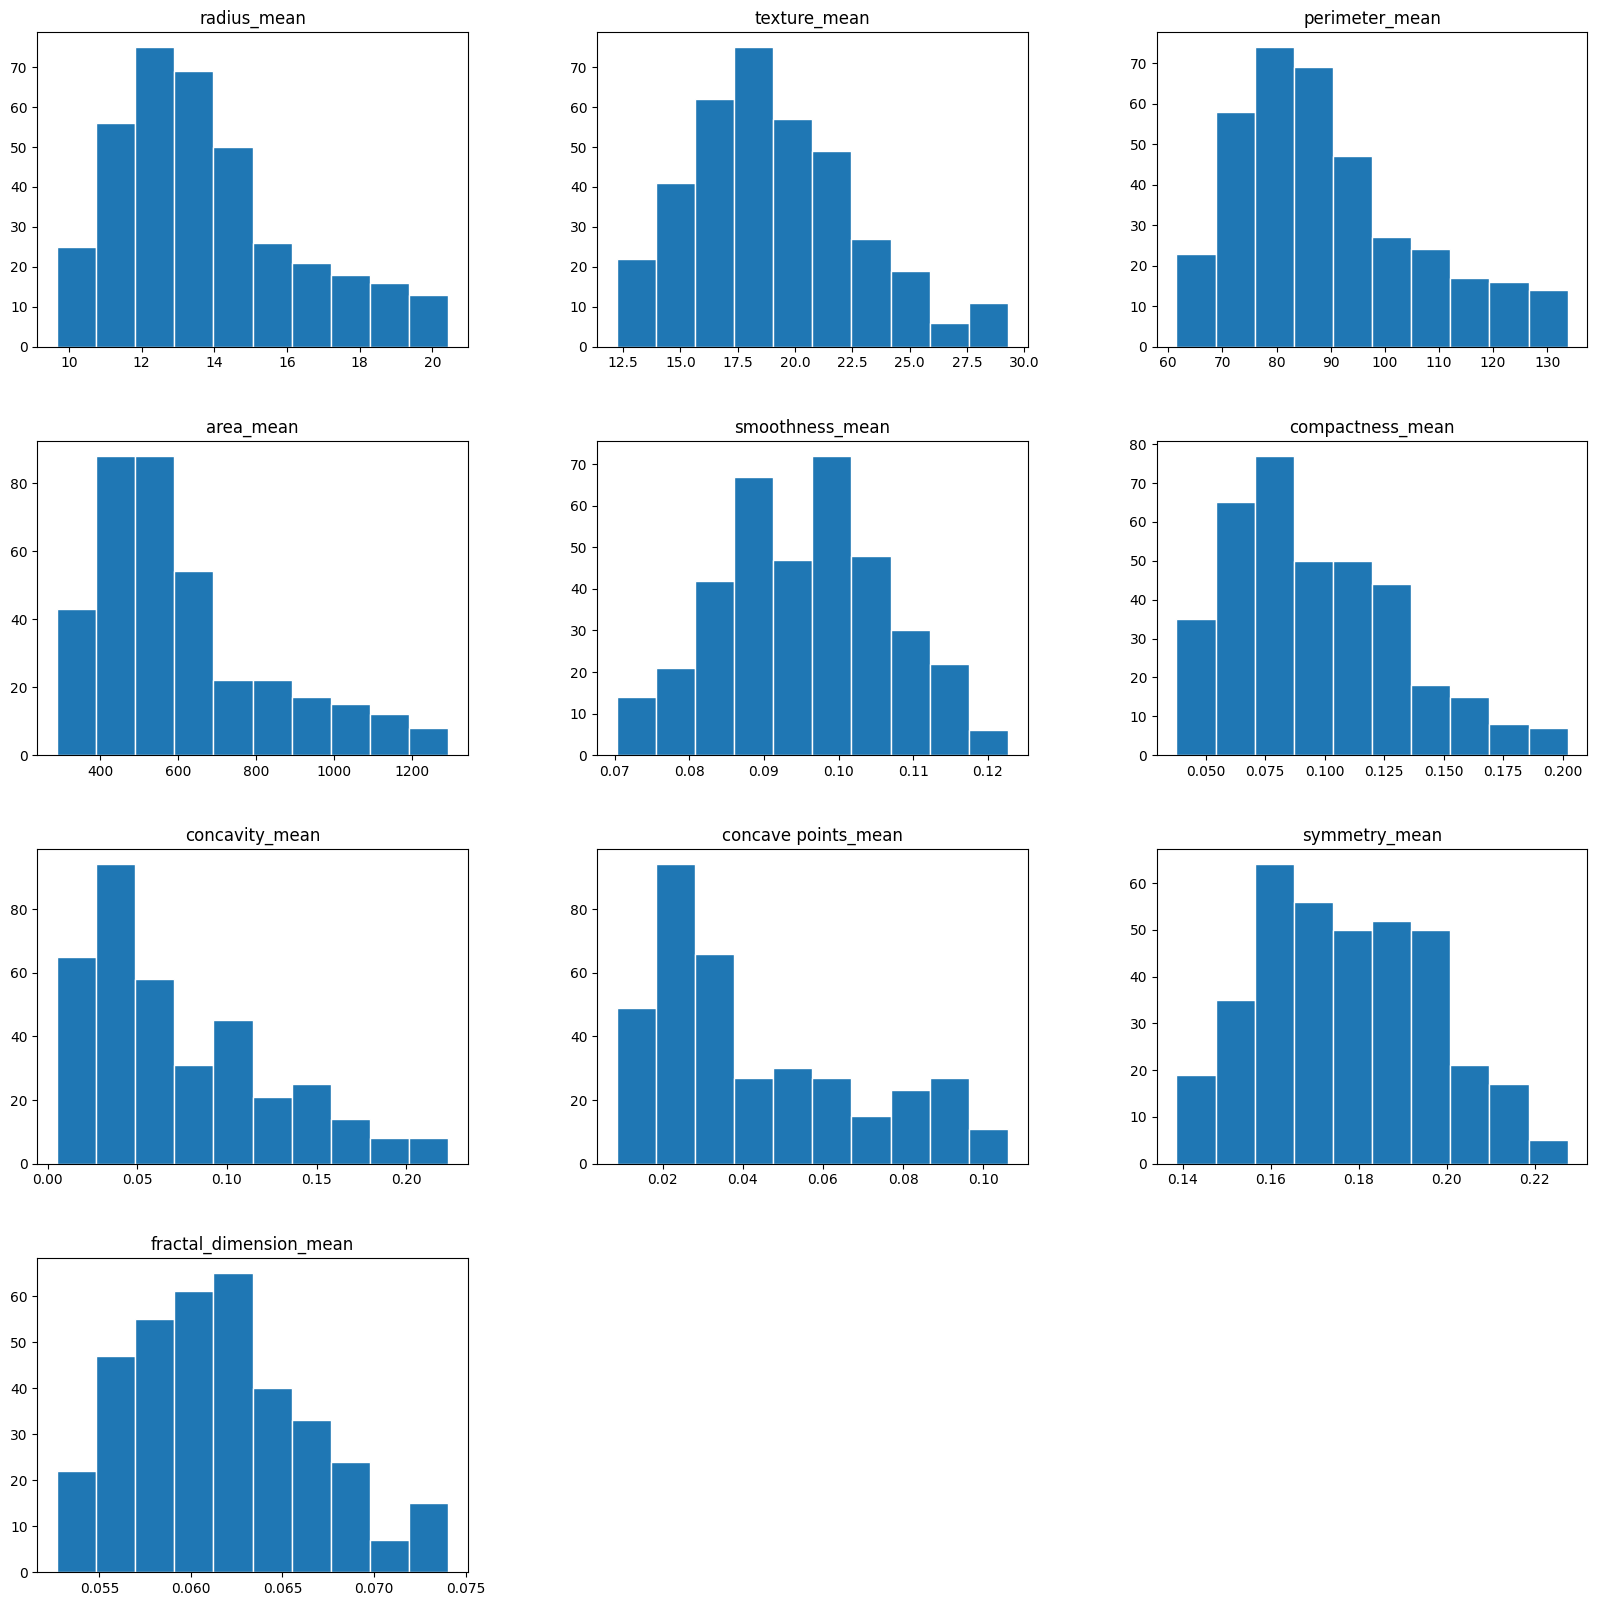

In [220]:
df_cleaned.hist(figsize=(20,20), histtype='bar', ec='white',grid=False)
plt.show()

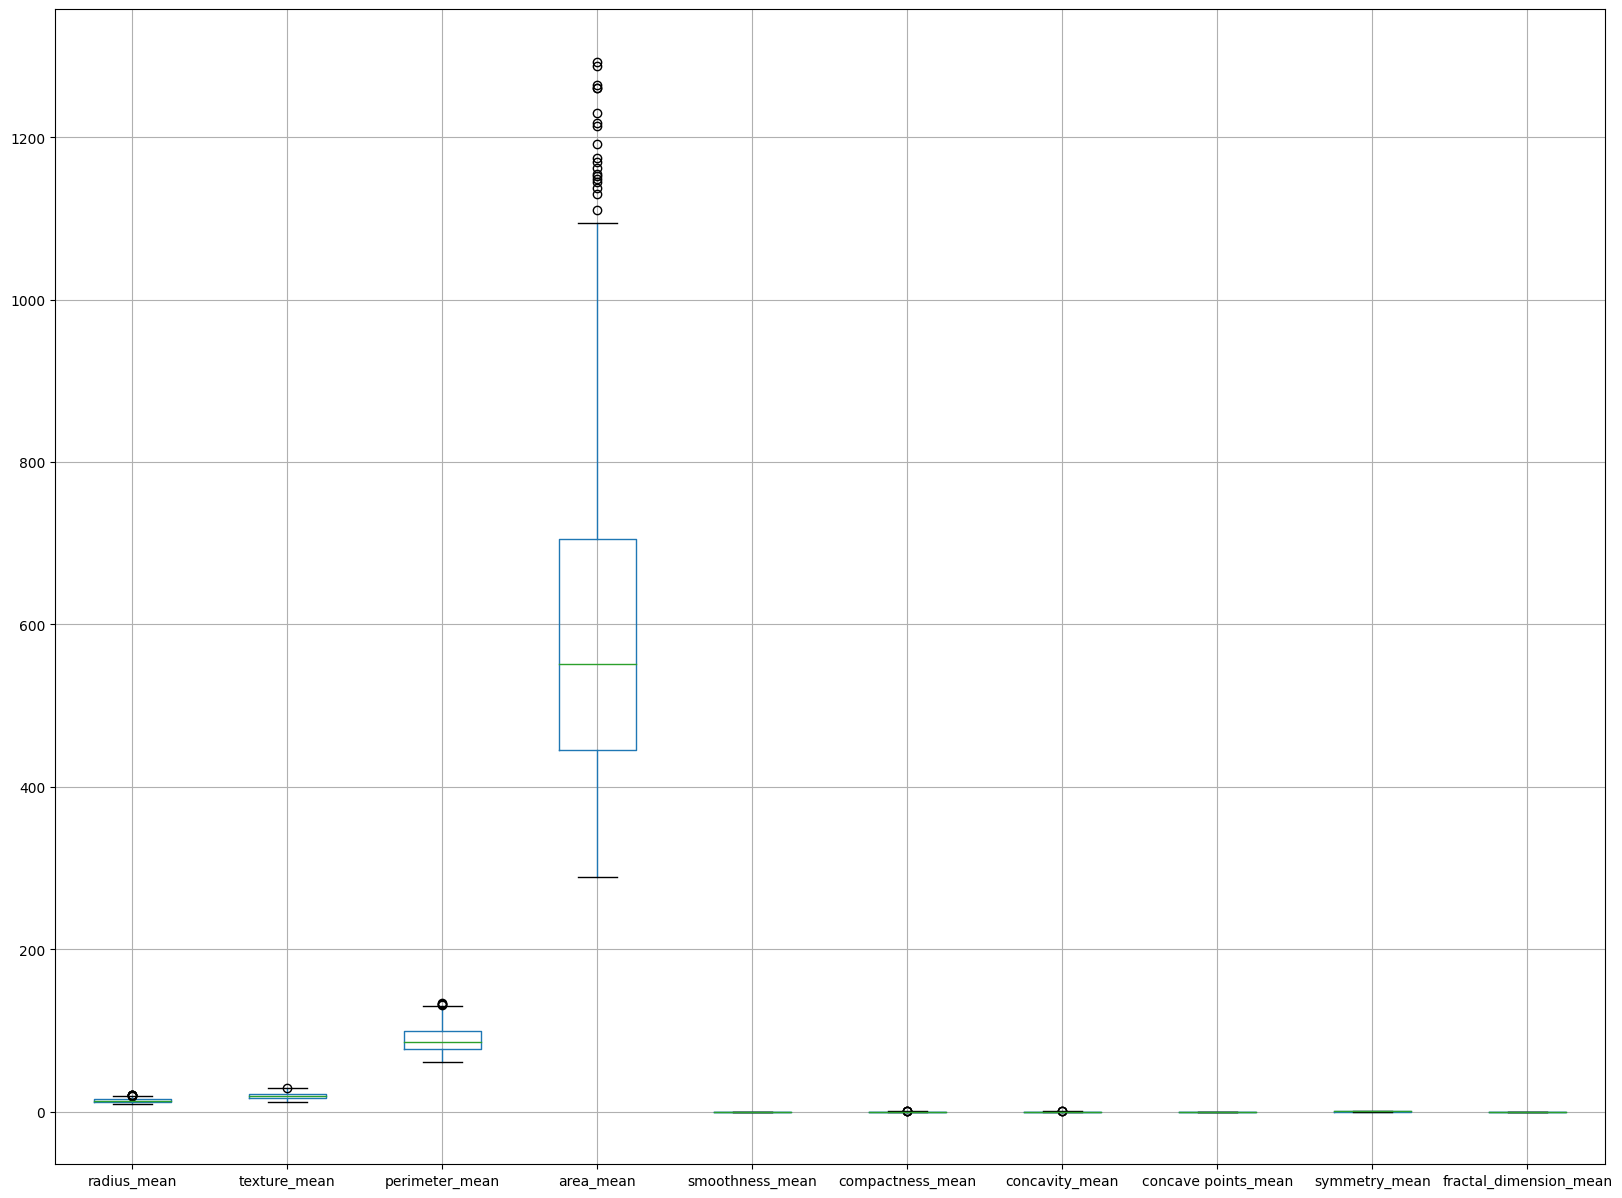

In [293]:
df_cleaned.boxplot(figsize=(20,15))
plt.show()

# SVM Model

In [225]:
# I did try to apply the model on data_clean but the result is worse than the original dataset so I restore data_clean = data
# data_clean = df_cleaned
data_clean = data

In [226]:
# Separating the data features
X = data_clean.drop(columns = ['diagnosis'], axis = 1)

# Assign data labels to variable y
y = data_clean.diagnosis

# Encoding the label y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split train/test with random_state = 10
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.8)

In [227]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284


In [228]:
# Initialize and use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.transform(X_test)

In [229]:
# Initialize and fit the SVC model to the training set without tuning hyperparameter
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_normalized_train, y_train)

SVC()

In [230]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
             'gamma': ['scale', 0.001, 0.005, 0.1]}
gridsearch = GridSearchCV(SVC(), param_grid, cv=10, scoring='f1', verbose=1)

In [231]:
# Run the search on training data samples.
svm_gs = gridsearch.fit(X_normalized_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [232]:
# Showing the best hyperparamter set
svm_gs.best_params_

{'C': 1000, 'gamma': 0.005}

In [233]:
# Show the results of each hyperparameter with 10-fold cross validation
result = pd.DataFrame(svm_gs.cv_results_)
result = result.set_index('params')

# Ranking the score of each hyperparameter to choose the best one
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
"{'C': 1000, 'gamma': 0.005}",0.937344,1
"{'C': 10, 'gamma': 'scale'}",0.936417,2
"{'C': 10, 'gamma': 0.1}",0.936417,2
"{'C': 100, 'gamma': 0.005}",0.924480,4
"{'C': 1, 'gamma': 0.1}",0.919720,5
"{'C': 1, 'gamma': 'scale'}",0.919720,5
"{'C': 1000, 'gamma': 0.001}",0.915976,7
"{'C': 100, 'gamma': 0.1}",0.915169,8
"{'C': 100, 'gamma': 'scale'}",0.915169,8


In [234]:
# Build the SVC pipeline from the best hyperparamter set
svm_cv = SVC(C=gridsearch.best_params_['C'], gamma = gridsearch.best_params_['gamma'])
svm_cv.fit(X_normalized_train, y_train)

SVC(C=1000, gamma=0.005)

In [199]:
# @title **SVM model using data removed outliers in all columns** *! DO NOT RERUN !*

cleaned_data_report_tuning = classification_report(y_test, svm_cv.predict(X_normalized_test))
cleaned_data_report_no_tuning = classification_report(y_test, svm.predict(X_normalized_test))
print("SVM model's result with tuning hyperparamter")
print(cleaned_data_report_tuning)
print("SVM model's result without tuning hyperparamter")
print(cleaned_data_report_no_tuning)

SVM model's result with tuning hyperparamter
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.89      0.89      0.89        19

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.95        74

SVM model's result without tuning hyperparamter
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.89      0.89      0.89        19

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.95        74



**I stored these reports to see that the model perform better on the original data than the data which has been removed outliers in all columns**

## SVM Model using original data

In [235]:
# SVM model's result with tuning hyperparamter
from sklearn.metrics import classification_report
print("SVM model used original data")
print("SVM model's result with tuning hyperparamter")
print(classification_report(y_test, svm_cv.predict(X_normalized_test)))

# SVM model's result without tuning hyperparamter
print("SVM model's result without tuning hyperparamter")
print(classification_report(y_test, svm.predict(X_normalized_test)))

SVM model used original data
SVM model's result with tuning hyperparamter
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM model's result without tuning hyperparamter
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## SVM model with removing outliers from only 2 most skewed features

In [213]:
# Calculate skewness for each numerical feature
skewness = data[num_cols].skew()

# Sort skewness values in descending order
skewness = skewness.sort_values(ascending=False)

# Print skewness values
print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
area_mean                 1.645732
concavity_mean            1.401180
fractal_dimension_mean    1.304489
compactness_mean          1.190123
concave points_mean       1.171180
perimeter_mean            0.990650
radius_mean               0.942380
symmetry_mean             0.725609
texture_mean              0.650450
smoothness_mean           0.456324
dtype: float64


**SO the most two skewed features from the dataset is "area_mean" and "concavity mean"**

In [239]:
# Removing outliers from 2 most skewed features
q = data['area_mean'].quantile(0.98)  # Select q range as 98%
p = data['area_mean'].quantile(0.02)
data_clean_trial = data[(data['area_mean'] < q)
                  & (data['area_mean'] > p)]

q = data['concavity_mean'].quantile(0.98)  # Select q range as 98%
p = data['concavity_mean'].quantile(0.02)
data_clean_trial = data_clean_trial[(data_clean_trial['concavity_mean'] < q) & (data_clean_trial['concavity_mean'] > p)]
data_clean_trial.shape

(531, 11)

In [240]:
# Separate the data features and data labels
X_trial = data_clean_trial.drop(columns = ['diagnosis'], axis = 1)
y_trial = data_clean_trial.diagnosis

# Encoding the labels
y_trial = le.fit_transform(y_trial)

# Split the data samples to train/test set
X_train_trial, X_test_trial, y_train_trial, y_test_trial= train_test_split(X_trial, y_trial, random_state = 10, train_size = 0.8)

In [241]:
# Normalize the data
X_normalized_train_trial = scaler.fit_transform(X_train_trial)
X_normalized_test_trial = scaler.transform(X_test_trial)

In [242]:
# Initialize and fit the SVC model without tuning hyperparamters
svm.fit(X_normalized_train_trial, y_train_trial)

SVC()

In [243]:
# Run the search on training data samples.
svm_gs = gridsearch.fit(X_normalized_train_trial, y_train_trial)

# Build the SVC pipeline from the best hyperparamter set
svm_cv = SVC(C=gridsearch.best_params_['C'], gamma = gridsearch.best_params_['gamma'])
svm_cv.fit(X_normalized_train_trial, y_train_trial)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


SVC(C=1000, gamma=0.005)

In [244]:
print("SVM model's result without tuning hyperparamter")
print(classification_report(y_test_trial, svm.predict(X_normalized_test_trial)))
print("SVM model's result with tuning hyperparamter")
print(classification_report(y_test_trial, svm_cv.predict(X_normalized_test_trial)))

SVM model's result without tuning hyperparamter
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        75
           1       0.86      1.00      0.93        32

    accuracy                           0.95       107
   macro avg       0.93      0.97      0.95       107
weighted avg       0.96      0.95      0.95       107

SVM model's result with tuning hyperparamter
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        75
           1       0.89      1.00      0.94        32

    accuracy                           0.96       107
   macro avg       0.94      0.97      0.96       107
weighted avg       0.97      0.96      0.96       107



**Evaluation:**
* The SVM models using the original data (with and without tuning hyperparameters) generally perform better compared to the SVM model using the dataset with removed outliers in all columns.
* Removing outliers from only 2 most skewed features resulted in comparable performance to the SVM model using the original data, suggesting that focusing on outliers in those specific features may be sufficient for improving model performance.
* Overall, SVM models demonstrate high accuracy and F1-scores for both classes, indicating good performance in classifying breast cancer diagnoses.

# Four classifiers

## Logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model

params = {'C': [0.001, 0.01, 0.01, 1, 10, 100]}
gridsearch = GridSearchCV(logmodel, params, cv = 10)

# # Run the search on the training set
log_gs = gridsearch.fit(X_normalized_train, y_train)
log_gs_trial = gridsearch.fit(X_normalized_train_trial, y_train_trial)

In [246]:
# Ranking the score of each hyperparameter to choose the best one
result = pd.DataFrame(log_gs.cv_results_)
result = result.set_index('params')
result[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,mean_test_score,rank_test_score
params,,
{'C': 10},0.929070,1
{'C': 100},0.926689,2
{'C': 1},0.924419,3
{'C': 0.01},0.908140,4
{'C': 0.01},0.908140,4
{'C': 0.001},0.835271,6


In [247]:
# Train the model
log_model = LogisticRegression(C = log_gs.best_params_['C'])
log_model.fit(X_normalized_train, y_train)

LogisticRegression(C=10)

In [248]:
# Train the model
log_model_trial = LogisticRegression(C = log_gs_trial.best_params_['C'])
log_model_trial.fit(X_normalized_train_trial, y_train_trial)

LogisticRegression(C=10)

In [249]:
print('Classification report with original dataset')
print(classification_report(y_test, log_model.predict(X_normalized_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test, log_model_trial.predict(X_normalized_test)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.90      0.92      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Naive Bayes

###Without StandardScaler

In [250]:
# Initialize Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

# Define the values of hyperparameter var_smoothing we want to try
grid_search={"var_smoothing":[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 2e-2, 2e-3, 2e-4, 2e-5, 2e-6, 2e-7, 2e-8, 2e-9, 2e-10, 2e-11, 2e-12, 2e-13, 2e-14, 2e-15]} # Define the values of hyperparameter C we want to try

# Set up GridSearchCV to find the best value of hyperparameter var_smoothing, with 10-fold cross validation
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(naive_model, grid_search, cv=10)

In [251]:
# Train the model
naive_gs = gridsearch.fit(X_train, y_train)
naive_gs_trial = gridsearch.fit(X_train_trial, y_train_trial)

In [252]:
# Show the results of each hyperparameter var_smoothing with 10-fold cross validation
result_normal = pd.DataFrame(naive_gs.cv_results_)
result_normal = result_normal.set_index('params')

# Ranking the score of each hyperparameter var_smoothing to choose the best one
result_normal[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
{'var_smoothing': 2e-10},0.910520,1
{'var_smoothing': 1e-10},0.910520,1
{'var_smoothing': 1e-15},0.908140,3
{'var_smoothing': 2e-13},0.908140,3
{'var_smoothing': 2e-12},0.908140,3
{'var_smoothing': 2e-11},0.908140,3
{'var_smoothing': 2e-14},0.908140,3
{'var_smoothing': 1e-14},0.908140,3
{'var_smoothing': 1e-13},0.908140,3


In [253]:
# Initialize the naive-bayes model and fit
naive = GaussianNB(var_smoothing = naive_gs.best_params_['var_smoothing'])
naive.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-10)

In [254]:
# Initialize the naive-bayes model and fit
naive_trial = GaussianNB(var_smoothing = naive_gs_trial.best_params_['var_smoothing'])
naive_trial.fit(X_train_trial, y_train_trial)

GaussianNB(var_smoothing=1e-10)

In [255]:
print('Classification report with original dataset')
print(classification_report(y_test, naive.predict(X_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, naive_trial.predict(X_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.88      0.90      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        75
           1       0.84      0.97      0.90        32

    accuracy                           0.93       107
   macro avg       0.91      0.94      0.93       107
weighted avg       0.94      0.93      0.94       107



###With StandardScaler

In [256]:
# Run the search on training set
naive_normal_gs = gridsearch.fit(X_normalized_train, y_train)

# Initialize and train the model
naive_normal = GaussianNB(var_smoothing = naive_normal_gs.best_params_['var_smoothing'])
naive_normal.fit(X_normalized_train, y_train)

GaussianNB(var_smoothing=0.02)

In [257]:
# Run the search on training set
naive_normal_gs_trial = gridsearch.fit(X_normalized_train_trial, y_train_trial)

# Initialize and train the model
naive_normal_trial = GaussianNB(var_smoothing = naive_normal_gs_trial.best_params_['var_smoothing'])
naive_normal_trial.fit(X_normalized_train_trial, y_train_trial)

GaussianNB(var_smoothing=0.02)

In [258]:
print('Classification report with original dataset')
print(classification_report(y_test, naive_normal.predict(X_normalized_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, naive_normal_trial.predict(X_normalized_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.88      0.90      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        75
           1       0.83      0.94      0.88        32

    accuracy                           0.93       107
   macro avg       0.90      0.93      0.91       107
weighted avg       0.93      0.93      0.93       107



##Decision Tree

In [259]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
        "max_depth": [4, 6, 8, 10],                           # Maximum depth of the tree
         "min_samples_split": [2, 4, 6, 8],
          "min_samples_leaf": [2, 4, 6, 8],
          "max_leaf_nodes": [8, 10, 12]}

gridsearch = GridSearchCV(tree, params, cv=5)

In [260]:
# Run the search on the training set
tree_gs = gridsearch.fit(X_train, y_train)
tree_gs_trial = gridsearch.fit(X_train_trial, y_train_trial)

In [261]:
# Ranking the score of each hyperparameter to choose the best one
result = pd.DataFrame(tree_gs.cv_results_)
result = result.set_index('params')
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
"{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 12, 'min_samples_leaf': 2, 'min_samples_split': 4}",0.929244,1
"{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}",0.926863,2
"{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 8}",0.924538,3
"{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 6}",0.924538,3
"{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}",0.924538,3
...,...,...
"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 12, 'min_samples_leaf': 4, 'min_samples_split': 4}",0.886723,380
"{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}",0.884454,381
"{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 12, 'min_samples_leaf': 4, 'min_samples_split': 4}",0.884398,382


In [263]:
# Initialize the model
tree_model = DecisionTreeClassifier(criterion = tree_gs.best_params_['criterion'],
                                    max_depth = tree_gs.best_params_['max_depth'],
                                    max_leaf_nodes = tree_gs.best_params_['max_leaf_nodes'],
                                    min_samples_split = tree_gs.best_params_['min_samples_split'],
                                    min_samples_leaf = tree_gs.best_params_['min_samples_leaf'])

In [264]:
# Initialize the model
tree_model_trial = DecisionTreeClassifier(criterion = tree_gs_trial.best_params_['criterion'],
                                    max_depth = tree_gs_trial.best_params_['max_depth'],
                                    max_leaf_nodes = tree_gs_trial.best_params_['max_leaf_nodes'],
                                    min_samples_split = tree_gs_trial.best_params_['min_samples_split'],
                                    min_samples_leaf = tree_gs_trial.best_params_['min_samples_leaf'])

In [265]:
# Train the model
tree_model.fit(X_train, y_train)
tree_model_trial.fit(X_train_trial, y_train_trial)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=12,
                       min_samples_leaf=2, min_samples_split=4)

In [266]:
print('Classification report with original dataset')
print(classification_report(y_test, tree_model.predict(X_test)))

print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, tree_model_trial.predict(X_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        75
           1       0.89      0.85      0.87        39

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.91      0.94      0.92        32

    accuracy                           0.95       107
   macro avg       0.94      0.95      0.94       107
weighted avg       0.95      0.95      0.95       107



##Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}

# Initialize the GridSeachCV
gridsearch = GridSearchCV(RandomForestClassifier(n_estimators=10, n_jobs = 10),params,cv=10)

In [268]:
# Run the search on the training set
forest_gs = gridsearch.fit(X_train, y_train)
forest_gs_trial = gridsearch.fit(X_train_trial, y_train_trial)

result = pd.DataFrame(forest_gs.cv_results_)
result = result.set_index('params')

result[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,mean_test_score,rank_test_score
params,,
"{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 12}",0.929457,1
"{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 8}",0.929181,2
"{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 12}",0.926910,3
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 8}",0.924585,4
"{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 16}",0.919934,5
"{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 12}",0.919878,6
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 12}",0.919823,7
"{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 12}",0.917719,8
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 16}",0.917553,9


In [269]:
# Build the pipeline from the best hyperparamter set
forest_model = RandomForestClassifier(n_estimators=10,
                                      random_state=1,
                                      criterion = forest_gs.best_params_['criterion'],
                                      max_depth = forest_gs.best_params_['max_depth'],
                                      min_samples_split = forest_gs.best_params_['min_samples_split'])

In [270]:
# Build the pipeline from the best hyperparamter set
forest_model_trial = RandomForestClassifier(n_estimators=10,
                                      random_state=1,
                                      criterion = forest_gs_trial.best_params_['criterion'],
                                      max_depth = forest_gs_trial.best_params_['max_depth'],
                                      min_samples_split = forest_gs_trial.best_params_['min_samples_split'])

In [271]:
forest_model.fit(X_train, y_train)
print('Classification report with original dataset')
print(classification_report(y_test, forest_model.predict(X_test)))

forest_model_trial.fit(X_train_trial, y_train_trial)
print('Classification report with cleaned dataset')
print(classification_report(y_test_trial, forest_model_trial.predict(X_test_trial)))

Classification report with original dataset
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification report with cleaned dataset
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.94      0.97      0.95        32

    accuracy                           0.97       107
   macro avg       0.96      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



##Comparision

Comparing these models with the SVM models' performance:

* For the original data, the SVM model generally performs similarly to or slightly better than other models in terms of accuracy and F1-scores.
* However, after removing outliers from the two most skewed features, some models like Decision Tree and Random Forest show improvement in performance, approaching or surpassing the SVM model's performance.
* Naive Bayes, especially with the cleaned data and without StandardScaler, also shows competitive performance, though slightly lower than the SVM model.

**Overall, the choice of model depends on various factors such as dataset characteristics, computational resources, interpretability, and specific goals of the analysis. However, based on these results, SVM models generally perform well and are competitive with other models.**

# Model ensemble techniques

##Bagging with SVM Machine

In [273]:
# Bagging with Support Vector Machine (SVM)
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Initialize base SVM model
base_svm = SVC(kernel='linear', C=1.0)

# Create Bagging Classifier with SVM as the base model
bagging_clf = BaggingClassifier(base_estimator=base_svm, n_estimators=10, max_samples=0.5)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Evaluate the Bagging Classifier
bagging_accuracy = bagging_clf.score(X_test, y_test)
print("Bagging Classifier Accuracy:", bagging_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.8859649122807017


##Boosting

In [276]:
# Boosting with AdaBoost, Gradient Boosting, and XGBoost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

###AdaBoost

In [278]:
# AdaBoost
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
ada_clf.fit(X_train, y_train)
ada_accuracy = ada_clf.score(X_test, y_test)
print("AdaBoost Classifier Accuracy:", ada_accuracy)

AdaBoost Classifier Accuracy: 0.9035087719298246


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


###Gradient Boosting

In [277]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)
gb_clf.fit(X_train, y_train)
gb_accuracy = gb_clf.score(X_test, y_test)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)


Gradient Boosting Classifier Accuracy: 0.9298245614035088


###XGBoost

In [279]:
# XGBoost
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_clf.fit(X_train, y_train)
xgb_accuracy = xgb_clf.score(X_test, y_test)
print("XGBoost Classifier Accuracy:", xgb_accuracy)


XGBoost Classifier Accuracy: 0.9649122807017544


##Stacking

###K-Nearest Neighbors (KNN)

In [280]:
# Train a K-Nearest Neighbor (KNN) model
knn = KNeighborsClassifier()                           # Initialize KNN model.
params_knn = {'n_neighbors': np.arange(1, 25)}         # n_neighbors in KNeighborsClassifier() indicates the number of neighbors K.
knn_gs = GridSearchCV(knn, params_knn, cv=5)           # Initialize GridSearchCV to find an optimal value of K.
knn_gs.fit(X_train, y_train)                           # Fit GridSearch in training set to find the optimal K.

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [281]:
# Best number of neighbors K
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 6}


###Support Vector Machine (SVM)

In [282]:
# Train a Support Vector Machine (SVM) model
svm = SVC()

# C is a hyperparameter that controls the trade-off between training error and margin maximization.
# Higher C: Stricter enforcement of correct classification for all training points, and less emphasis on margin maximization.
# Lower C: More tolerance for misclassifications on the training data, and more emphasis on margin maximization.
# For more hyperparameters of SVM, kindly refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
params_svm = {"C": [0.1, 1, 10, 100]}

svm_gs = GridSearchCV(svm, params_svm, cv=5)    # Initialize GridSearchCV to find an optimal value if the hyperparameter C.
svm_gs.fit(X_train, y_train)                    # Fit GridSearch in training set to find the optimal C.

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [283]:
# Best value of the hyperparameter C.
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 10}


###Random Forest

In [284]:
# Train a Random Forest classifier
rf = RandomForestClassifier()                        # Initialize a Random Forest Classifier.
params_rf = {'n_estimators': [50, 100, 200]}         # n_estimator in RandomForestClassifier(...) indicates the number of Trees in the Forest.
rf_gs = GridSearchCV(rf, params_rf, cv=5)            # Initialize GridSearchCV to find an optimal number of Trees.
rf_gs.fit(X_train, y_train)                          # Fit GridSearch in training set to find the optimal number of Trees.

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [285]:
# Best number of Trees.
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 100}


###Logistic Regression

In [286]:
# Train a Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)   # Initialize Logistic Regression model.
log_reg.fit(X_train, y_train)                                 # Fit the model to training set.

LogisticRegression(max_iter=1000)

###Model Testing

In [287]:
# Print accuracy of single models on the test set
print('KNN: {}'.format(knn_best.score(X_test, y_test)))                     # KNN accuracy
print('SVM: {}'.format(svm_best.score(X_test, y_test)))                     # SVM accuracy
print('Random Forest: {}'.format(rf_best.score(X_test, y_test)))            # Random Forest accuracy
print('Logistic Regression: {}'.format(log_reg.score(X_test, y_test)))      # Logistic Regression accuracy

KNN: 0.8508771929824561
SVM: 0.868421052631579
Random Forest: 0.9473684210526315
Logistic Regression: 0.8596491228070176


###Model Ensembling

In [291]:
# Ensemble the four models using hard (majority) voting
estimators=[('knn', knn_best), ('svm', svm_best), ('rf', rf_best), ('log_reg', log_reg)]    # Initialize base models in the ensemble
ensemble = VotingClassifier(estimators, voting='hard')                                      # Define how to ensemble them, i.e., hard voting

In [292]:
# Train the model ensemble on the training set
ensemble.fit(X_train, y_train)          # Train the ensemble on the training set
voting_accuracy = ensemble.score(X_test, y_test)          # Test the ensemble on the test set
print("Voting Classifier Accuracy:", voting_accuracy)


Voting Classifier Accuracy: 0.868421052631579


##Comparision & Conclusion

**Comparison:**

* Among the ensemble methods, XGBoost performs the best, achieving an accuracy of 0.965, followed by Gradient Boosting (0.930) and AdaBoost (0.904).
* Stacking with the individual models and a Voting Classifier show similar accuracies, around 0.868. This indicates that simple majority voting of these models doesn't provide significant improvement over using the individual models separately.
* Random Forest among the individual models achieves the highest accuracy of 0.947, followed by SVM (0.868), Logistic Regression (0.860), and KNN (0.851).

**Conclusion:**

* Overall, ensemble methods, particularly XGBoost, demonstrate superior performance compared to individual models and simple model stacking. They leverage the strengths of multiple models to improve predictive accuracy.
* The choice between the ensemble methods depends on various factors such as computational resources, interpretability, and the specific characteristics of the dataset. XGBoost stands out as the best-performing model in this comparison, but it may require more computational resources compared to simpler ensemble methods like AdaBoost.